In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_style("darkgrid", {'axes.grid' : False})

In [85]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
gm_df = pd.read_csv('data/gendermodel.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
test_df.insert(1, 'Survived', gm_df['Survived'])
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [89]:
embarked = train_df['Embarked'].values
embarked = embarked.astype('<U1')
train_df['Embarked'] = embarked
embarked[embarked == 'Q'].shape[0]

77

In [90]:
data = train_df.iloc[:, (0,1,7)].values
places = ['S', 'C', 'Q']
pclass = []
survived = []
for place in places:
    place_slice = data[data[:,2] == place]
    pclass.append([
            place_slice[place_slice[:,1] == 1].shape[0],
            place_slice[place_slice[:,1] == 2].shape[0],
            place_slice[place_slice[:,1] == 3].shape[0]
        ])
    survived.append([
            place_slice[place_slice[:,0] == 0].shape[0],
            place_slice[place_slice[:,0] == 1].shape[0],
        ])
pclass = np.array(pclass)
pclass, survived

(array([[127, 164, 353],
        [ 85,  17,  66],
        [  2,   3,  72]]), [[427, 217], [75, 93], [47, 30]])

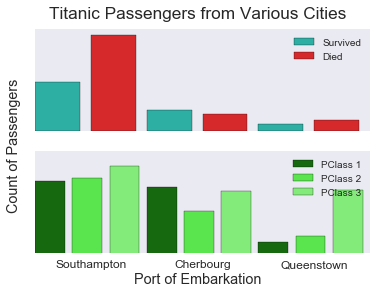

In [91]:
fig, (ax1, ax2) = plt.subplots(2,1)
st = fig.suptitle("Titanic Passengers from Various Cities", fontsize="xx-large")
fig.text(0.5, 0.02, 'Port of Embarkation', ha='center', size='x-large')
fig.text(0.06, 0.5, 'Count of Passengers', va='center', rotation='vertical', size='x-large')

alive = []
dead = []
for place in survived:
    dead.append(place[0])
    alive.append(place[1])
    
x_axis = np.array([0, 2, 4])
rect1 = ax1.bar(x_axis, alive, color='#2dafa3')
rect2 = ax1.bar(x_axis + 1, dead, color='#d6292c')
ax1.set_xticks([]) 
ax1.set_yticks([])
ax1.legend((rect1, rect2), ('Survived', 'Died'))

x_axis = np.array([0, 3, 6])
rect1 = ax2.bar(x_axis, pclass[:,0], color='#176910')
rect2 = ax2.bar(x_axis + 1, pclass[:,1], color='#5ae44e')
rect3 = ax2.bar(x_axis + 2, pclass[:,2], color='#83eb7a')
ax2.set_yscale('log')
ax2.set_xticks(x_axis + 1.5)
ax2.set_yticks([])
ax2.set_xticklabels(['Southampton', 'Cherbourg',  'Queenstown'], size='large')
ax2.legend((rect1, rect2, rect3), ('PClass 1', 'PClass 2', 'PClass 3'))
plt.show()

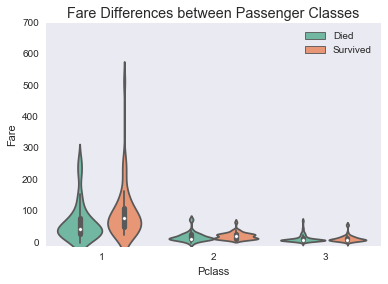

In [92]:
fig, ax = plt.subplots()
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=train_df,
              palette='Set2', split=False, ax=ax)
ax.set_ylim(bottom=-10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ('Died', 'Survived'))
plt.title('Fare Differences between Passenger Classes', size = 'x-large')
plt.show()

In [93]:
data = train_df.iloc[:, :4].values
male_survival_rate = []
female_survival_rate = []
for pclass in range(1, 4):
    piece = data[data[:,1] == pclass]
    male = piece[piece[:,2] == 'male']
    female = piece[piece[:,2] == 'female']
    male_survival_rate.append(np.mean(male[:,0]))
    female_survival_rate.append(np.mean(female[:,0]))
male_survival_rate, female_survival_rate

([0.36885245901639346, 0.1574074074074074, 0.13544668587896252],
 [0.9680851063829787, 0.9210526315789473, 0.5])

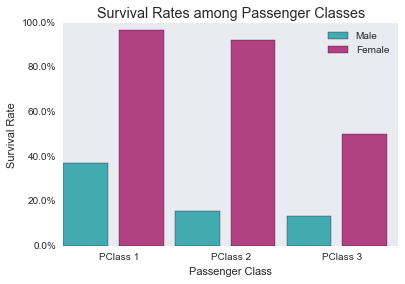

In [94]:
def percentage(val, pos):
    return str(val * 100) + '%'
formatter = FuncFormatter(percentage)

fig, ax = plt.subplots()
x_axis = np.array([0, 2, 4])
male_bars = ax.bar(x_axis, male_survival_rate, color='#43AAAF')
female_bars = ax.bar(x_axis + 1, female_survival_rate, color='#B24181')
plt.legend((male_bars, female_bars), ('Male', 'Female'))
ax.set_xticks(x_axis + 1)
ax.set_xticklabels(['PClass 1', 'PClass 2', 'PClass 3'])
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.title('Survival Rates among Passenger Classes', size='x-large')
plt.show()

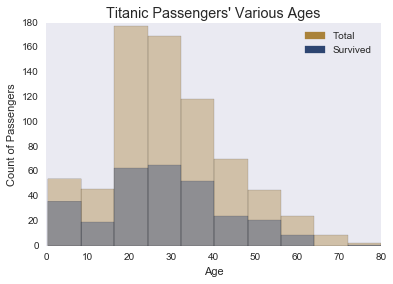

In [96]:
new_df = train_df.dropna()
fig, ax = plt.subplots()
rect1 = sns.distplot(new_df['Age'], kde=False, ax=ax, color='#AA8239', bins=10)
rect2 = sns.distplot(new_df[new_df['Survived'] == 1]['Age'], kde=False,
                     ax=ax, color='#2D4571', bins=10)
yellow_patch = mpatches.Patch(color='#AA8239', label='Total')
blue_patch = mpatches.Patch(color='#2D4571', label='Survived')
ax.legend(handles=[yellow_patch, blue_patch])
plt.title('Titanic Passengers\' Various Ages', size='x-large')
plt.ylabel('Count of Passengers')
plt.show()

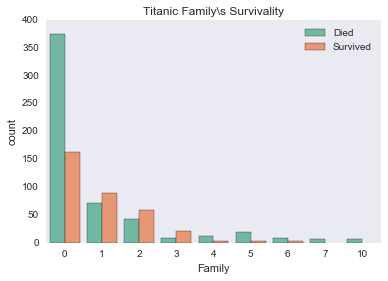

In [122]:
family = train_df['SibSp'].values + train_df['Parch'].values
survived = train_df['Survived'].values
family_df = DataFrame(np.column_stack((survived, family)))
family_df.columns = ['Survived', 'Family']
fig, ax = plt.subplots()
sns.countplot(x='Family', hue='Survived', data=family_df,
             palette = 'Set2', ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ('Died', 'Survived'))
plt.title('Titanic Family\'s Survivality')
plt.show()